In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [2]:
ExN = pd.read_csv('../../../extracted_data/ExN_filled_20.csv', sep = ',', index_col = 0)

embeddings = pd.read_csv('../../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep = ',', index_col = 0)
embeddings = embeddings.reset_index().set_index('gene_id')

R2:  -2.528143395435647
RMSE: 0.12683815093494946


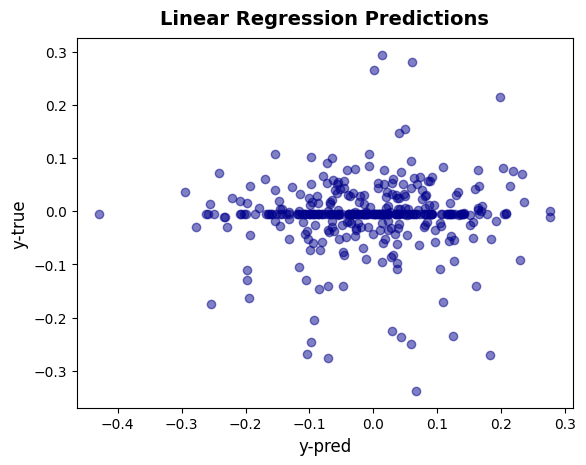

In [3]:
random.seed(38)

target_column = random.choice(ExN.columns)  # Randomly pick a column

# Align embeddings with interaction row
df = embeddings.merge(ExN[[target_column]], left_index=True, right_index=True, how='inner')
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9999942281812533


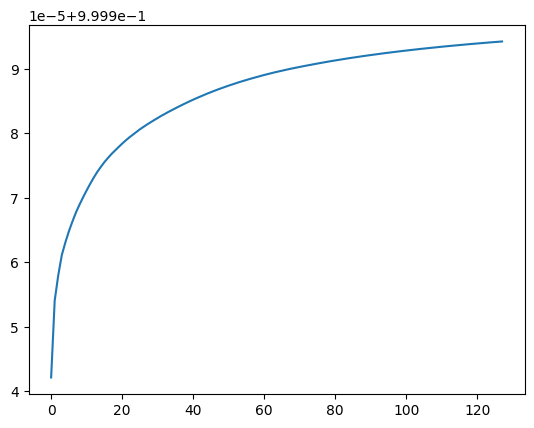

In [4]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=128
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [5]:
dims = 128
ExN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExN_PCA

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-3238.592313,-1.088079,-3.983588,-0.613934,-1.073606,-0.686450,1.534472,-2.909985,0.504577,0.342896,...,0.157493,0.410742,-0.306514,-0.287840,-0.572744,0.232867,0.334519,0.385902,-0.033726,-0.805760
1,-3233.591153,-7.279341,2.430703,2.539356,-3.208767,-2.949421,-0.812932,0.855823,0.908641,1.180000,...,-0.630780,-0.051681,0.076355,-0.063336,-0.406440,0.168812,-1.010402,0.395730,-0.028278,0.276154
2,-3231.591243,-3.307663,-0.021418,3.605772,-1.445315,-2.783352,-0.497466,2.477843,2.539473,0.009662,...,-0.422386,-0.282895,0.152345,-0.235128,-0.690895,-0.092674,-0.106159,-0.566043,0.321088,0.012930
3,-3221.591112,-4.811283,0.757574,7.124974,-1.058317,1.745447,-3.485022,-0.390043,0.123771,-2.792765,...,-0.048864,-0.466878,-0.227626,0.907923,0.023441,0.211566,-0.586326,0.123286,-0.262948,-0.495870
4,-3218.591404,13.022512,3.031596,-5.545423,-1.774661,-2.311148,-2.205433,-0.303259,-1.694822,0.631460,...,-0.369072,-0.104810,-0.632836,0.281411,0.130547,0.471399,0.521540,-0.518222,0.219265,0.301405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,3318.408744,-0.195140,0.975018,0.959711,3.200070,-1.986113,0.058171,2.646401,0.931368,-0.433440,...,0.051085,-0.159770,0.446861,0.109294,0.766783,0.580330,0.142814,-0.117738,0.186355,0.079013
1785,3325.408122,-10.178870,1.239751,-4.070209,-1.225061,2.313998,3.043138,-0.371104,0.441130,2.681083,...,0.721319,-0.356317,0.064595,0.133296,-0.678520,0.463336,-0.200173,-0.728251,0.055750,0.081580
1786,3326.407998,8.527589,-5.815144,-0.415006,3.175986,2.225430,0.367567,1.534038,1.042341,-0.567984,...,0.005751,0.416964,0.540087,-0.098527,-0.387336,0.561596,0.585312,-0.403153,0.354101,0.204575
1787,3328.408381,-4.439807,-2.045259,3.428655,3.473945,0.051047,0.200668,-0.738384,-0.248254,0.691997,...,-0.114314,-0.253379,0.112882,0.312440,-0.527407,0.105194,-0.137245,-0.409422,-0.182248,-0.310318


R2:  -0.05674294051579509
RMSE: 0.06941630071302088


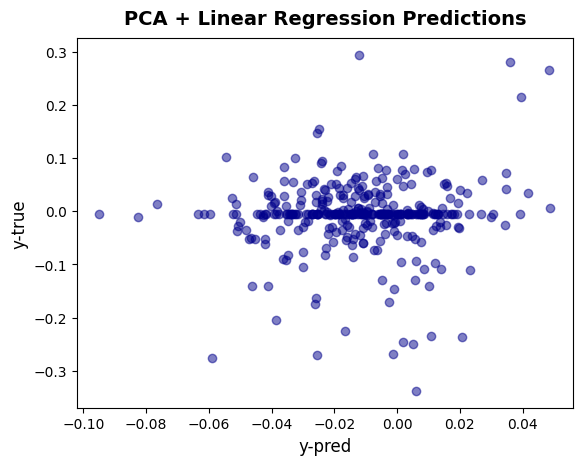

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ExN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.645e-01, tolerance: 5.995e-04
  model = cd_fast.enet_coordinate_descent(


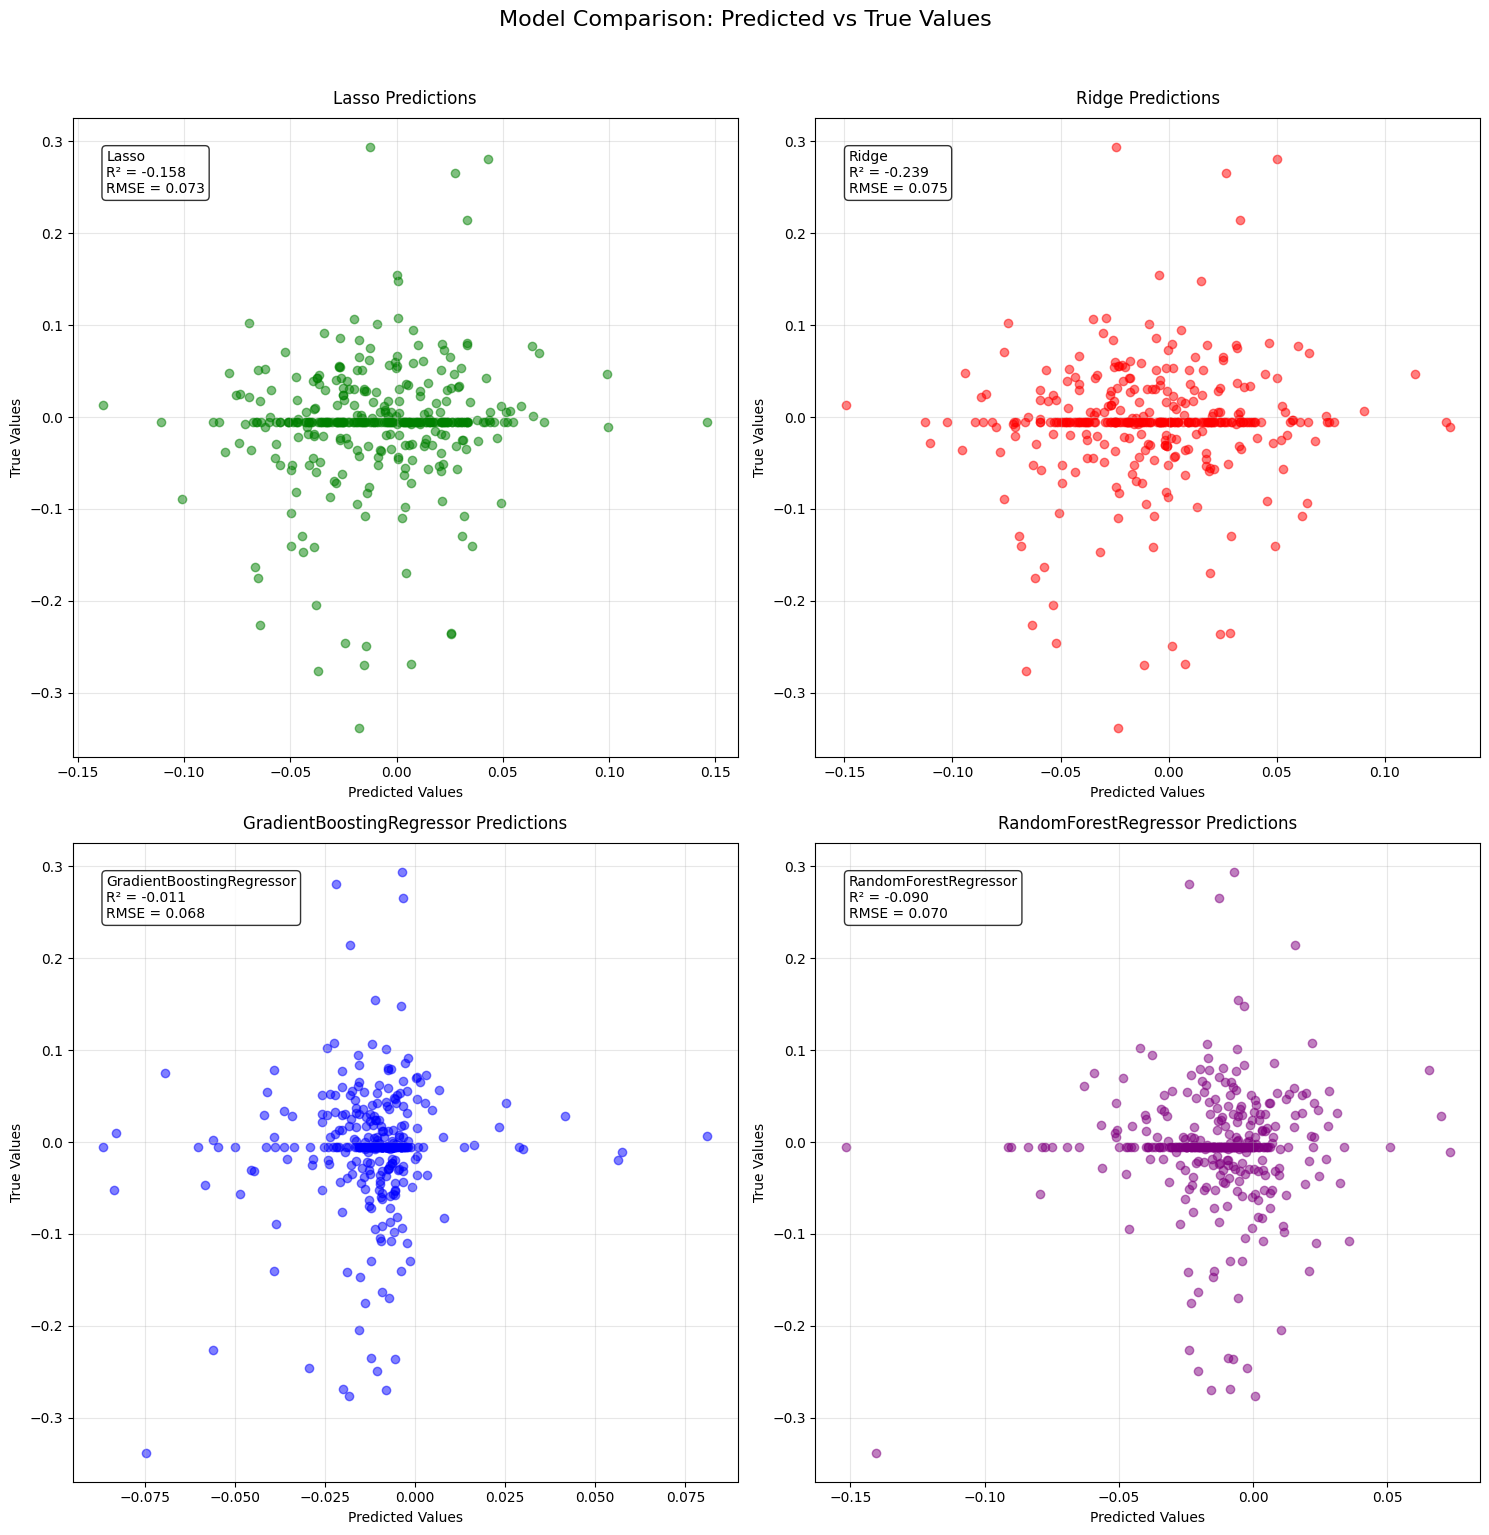

In [7]:
predictive_models = [  
                      Lasso(alpha=0.0001),
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 51.9111 - mse: 51.9111 - val_loss: 1.4086 - val_mse: 1.4086
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5922 - mse: 0.5922 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - mse

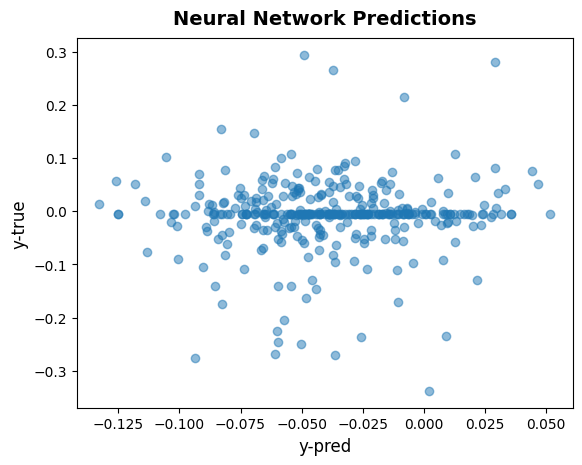

In [8]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()